In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr

import swamp

## Weighting coefficients

<xarray.DataArray 'c' (lat: 720, lon: 1150)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 25.0 25.03 25.07 25.1 25.14 ... 49.9 49.93 49.97 50.0
  * lon      (lon) float64 -125.0 -124.9 -124.9 -124.8 ... -65.1 -65.05 -65.0
Attributes:
    long_name:  Coefficient

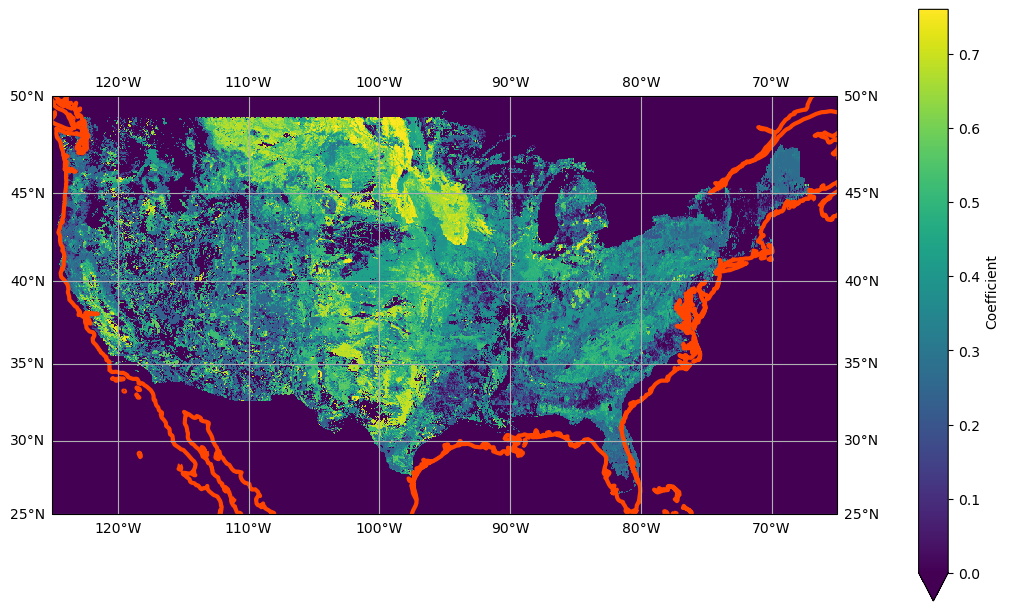

In [2]:
display(swamp.C)

proj = ccrs.Mercator()
tran = ccrs.PlateCarree()
fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(10, 6), constrained_layout=True)
ax.coastlines(linewidth=3, color="orangered")
ax.gridlines(draw_labels=True)

# swamp.C.plot(vmin=0, ax=ax, transform=tran);
swamp.calc._get_coeffs_ds(mask_neg=False).c.plot(vmin=0, ax=ax, transform=tran);

## Run

In [3]:
# NOTE: 215 (08/03) is missing, as are other random days
start = "2022/04/01"
end = "2022/04/15"
ic = None

ds = swamp.run(start, end, ic=ic)

loading PRISM P
loading ALEXI ET
computing P - ET
computing SM


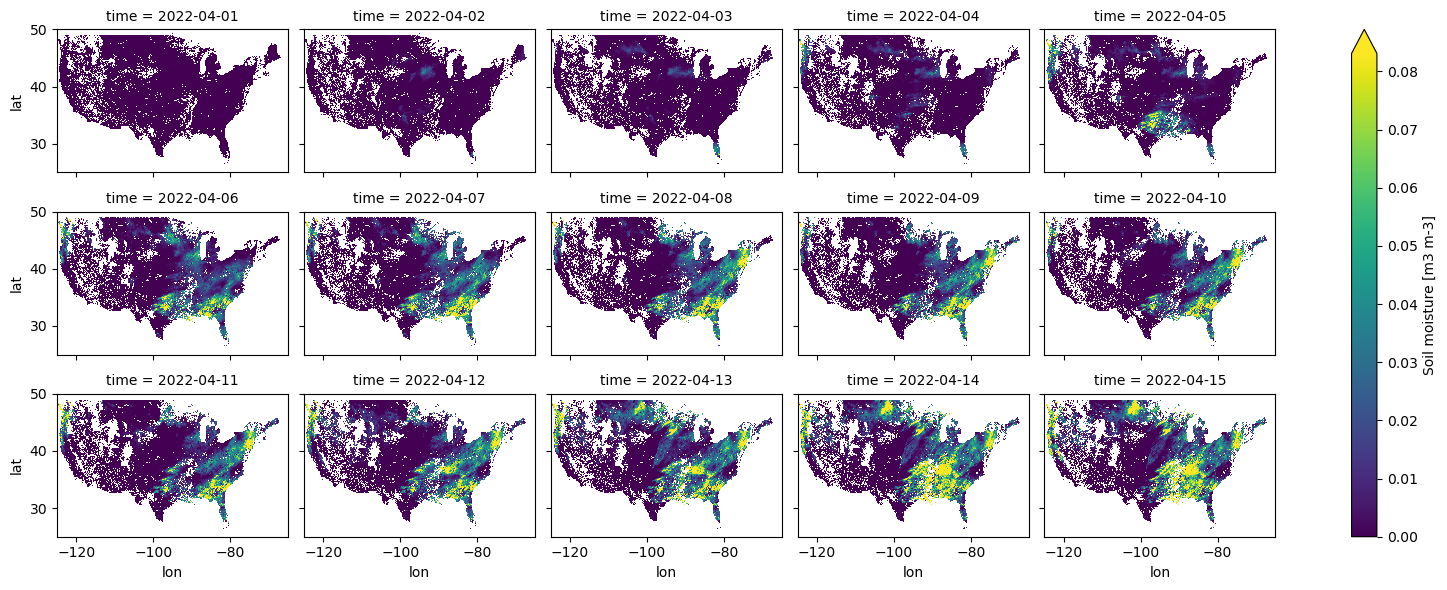

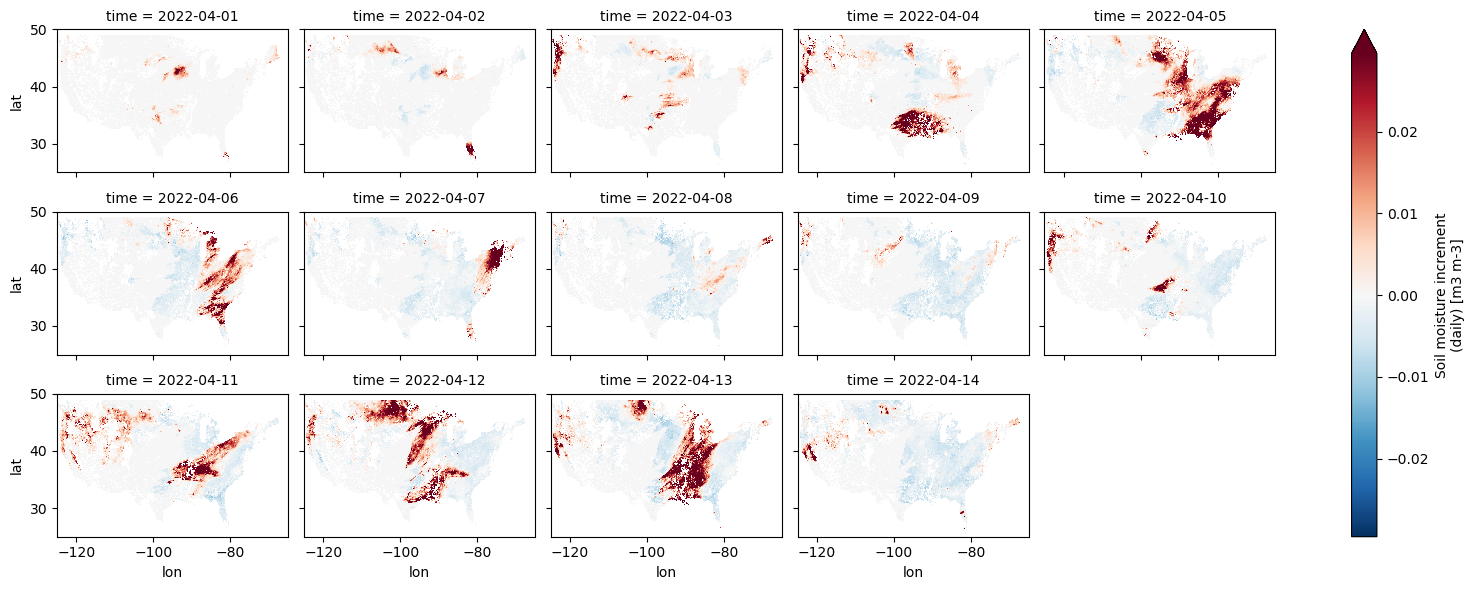

In [4]:
# # -21.25 coeffs
# proj = ccrs.Mercator()
# tran = ccrs.PlateCarree()
# fig, ax = plt.subplots(subplot_kw=dict(projection=proj))
# ax.coastlines(linewidth=3, color="orangered")
# ax.gridlines(draw_labels=True)
# ax.pcolormesh(lon, lat, np.where(slp_coeffs == -21.52, 1, np.nan), transform=tran)

# # Plot P - ET
# p_minus_et.plot(col="time", col_wrap=5, robust=True, size=2, aspect=1.5)

# Plot results
ds.sm.plot(col="time", col_wrap=5, robust=True, size=2, aspect=1.5)

# Plot deltas
with xr.set_options(keep_attrs=True):
    dsm = ds.sm.diff("time", label="lower")
    dsm.attrs.update(long_name="Soil moisture increment (daily)")
    dsm.plot(col="time", col_wrap=5, robust=True, size=2, aspect=1.5)